# Random Forest 

Random Forest Simplified:
Imagine you’re trying to decide what to wear today. You could ask a single friend for advice, but what if that friend gives bad advice? Instead, you decide to ask a group of friends and go with the majority opinion. This is the idea behind a Random Forest!

Key Ideas:
Forest of Decision Trees:

A random forest is like a collection of many decision trees.
Each tree gives its own "vote" for the prediction, and the forest takes the majority vote (for classification) or the average (for regression).
Randomness:

Random Subset of Data: Each tree is trained on a random portion of the dataset.
Random Subset of Features: Each tree considers only a random set of features when splitting the data.
This randomness makes the trees diverse, reducing the chance of overfitting (memorizing the training data).


Why Random Forest is Powerful:
Better Accuracy: By combining the results of multiple trees, it reduces errors compared to a single tree.
Robustness: It’s less likely to overfit because no single tree dominates the prediction.
Versatility: It works well for both classification and regression tasks.



Example in Action:
You want to classify whether a fruit is an apple or an orange.
Each tree looks at different features (e.g., color, weight, shape) and votes.
If most trees say “apple,” the random forest predicts it’s an apple.


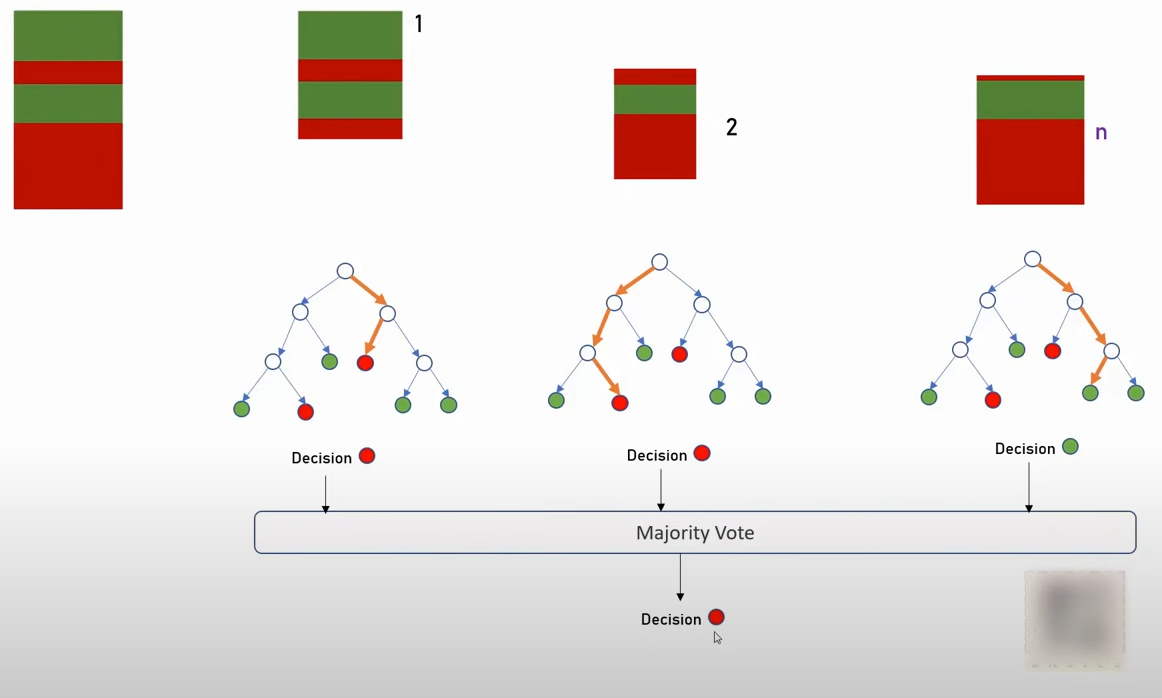


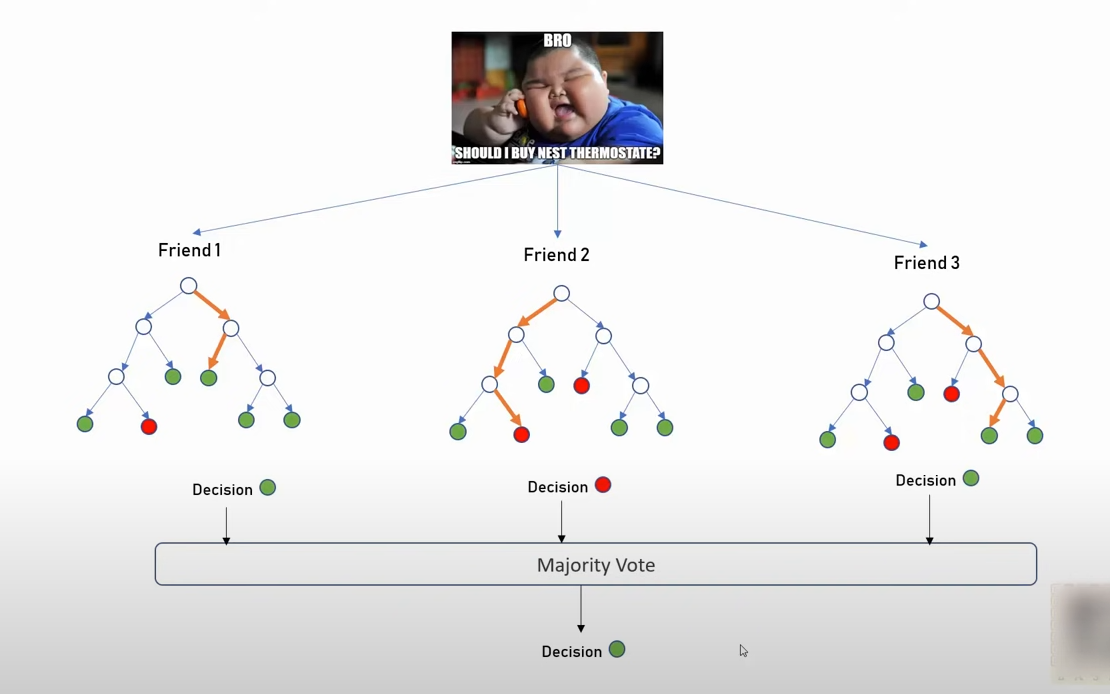

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

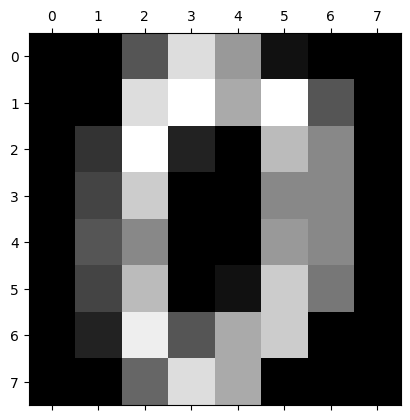

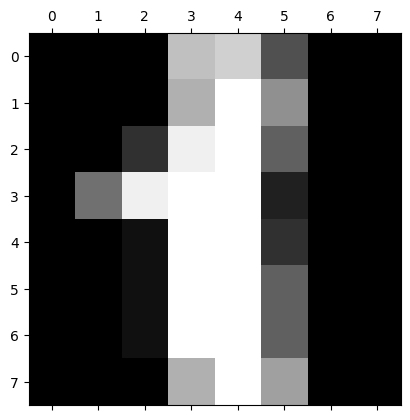

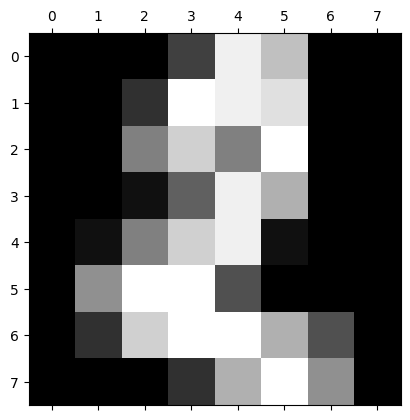

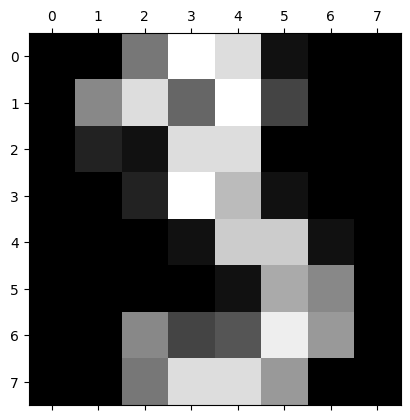

In [3]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])   

In [4]:
import pandas as pd 
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
df['target'] = digits.target

In [9]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
model.score(X_test, y_test)

0.9777777777777777

In [21]:
import seaborn as sn
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred=y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

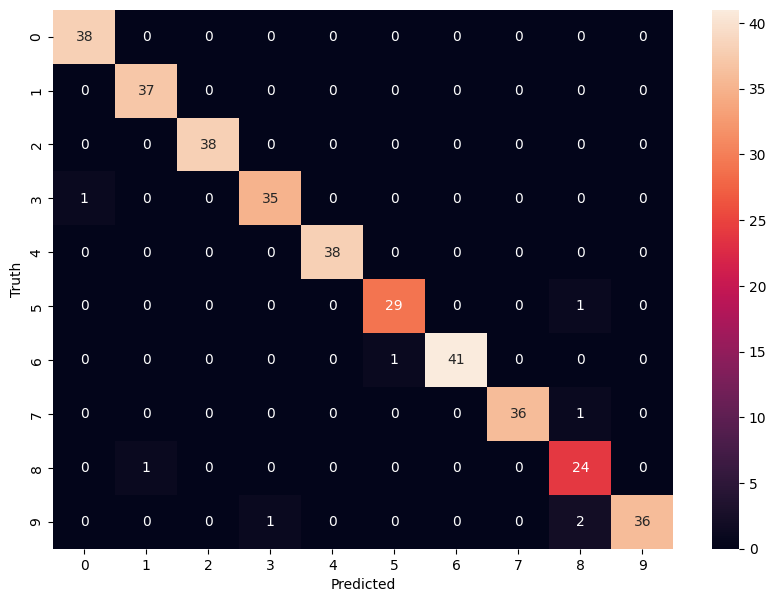

In [26]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')